# AI for Public Sector - Berlin Recyling challenge: Data Exploration

## Challenge description

The challenge is described roughly on the [N3xtcoder website](https://n3xtcoder.org/empower-logistics-with-ai) and, at this time, includes 3 projects (each with their own goal, objective and metric): 

### Project 1: 
#### Goal
Identify criteria for maintaining the health (and satisfaction) of waste workers and create a model.

#### Objective
Maximizing health & productivity.

#### Metric
Projected increase in productive days. Decrease in sickness and absence.
Improve the vacation planning and request process of drivers/loaders in order to decrease sick-days and non-ideal vacation-distribution. 

#### Why? (Background) 
Statistics seem to show a correlation between a vacation approval process that is non-ideal for the employee on the one hand and number of sick-days for that employee on the other hand. That triggers issues like skipped tours, which in return decreases customer satisfaction, employee satisfaction (because of more intense workload) and increases process-overhead/costs (customer support) and potentially losing contracts. 


### Project 2: 
#### Goal
Create a model that can predict the probability of tour cancellations.

#### Objective
Minimize tour failure & maximize prediction accuracy aka planning accuracy.

#### Metric
Projected reduction in the number of canceled pickups per tour.



### Project 3: 
#### Goal
Create a model for the dynamic rescheduling of schedules (assignment of personnel to tours), in the event of short-term changes.

#### Objective
Transition from static to dynamic route planning using internal and external data sources.

#### Metric
Projected maintenance of average occupancy of the planned tour at peak efficiency levels.


## This notebook...
is about very early exploration of the provided test (anonymized) datasets that Berlin Recyling provided to us. 


## Suggestions for next Todos / to clarify (N3xtcoder internally)
- [x] Try to load the dataset in a VSCode (devcontainer based) Jupyter notebook (didn't succeed immediately)
- [x] Start notebook on Kaggle
- [x] Integrate dataset files
- [x] Define helper function
- [x] Load all datasets
- [x] Fix issue with inconsistent header-column seperator chars (outlier: "Auftr„ge.csv")
- [x] Agree on a rough evaluation: do we see any potential for ML generating helpful/actionable insights with the given data model?
- [x] Improve column namings (English, writing conventions)

- [ ] Tryout Microsoft Data Science/ML tools with the dataset
- [ ] Are the data references all valid (no cross reference between datasets/'tables' to non-existing keys?)?
- [ ] Generate basic data exploration insights

- [ ] Check additional external data sources whether they could be of any value (see below)

## Identified issues with dataset
* The orders file/table ("Auftr„ge.csv") uses a different header-column seperator: tabs instead of commas

## Other potential interesting external data sources
  * https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset
    * "Absenteeism- is a major expense to most organizations. Getting a handle on it, predicting it and affecting it is important for organizations. This dataset provided for HR data scientists to practice on"
  * https://viz.berlin.de/verkehr-in-berlin/verkehrslage/
    * "Die Verkehrslagekarte Berlin zeigt Ihnen wo der Verkehr störungsfrei fließt (grün) und wo Sie mit Verkehrsbehinderungen (gelb) oder Stau (rot) rechnen müssen."
    * based probably on this dataset: https://daten.berlin.de/datensaetze/verkehrsdetektion-berlin
    * looks interesting since it has regularly updated traffic data which could be used to  e.g. find out whether there are correlations between traffic intensity of tours and sick leaves


## Prep (define helper functions etc)

## Recommendation
Before getting started, create a dedicated Python environment, e.g. via: 

```python3 -m venv venv```

Then activate this environment via: 

```source venv/bin/activate```

You also should install [Jupyter or Jupyter Lab](https://jupyter.org/). 

One comfortable way to run this notebook is via Visual Studio Code with the Jupyter extension. 

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 3.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 17.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/16/c6/75231fd47afd6b3f89011e7077f1a3958441264aca7ae9ff596e3276a5d0/pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dep

In [19]:
# datafolder = "initial-example-data"
# datafolder = "example-data-for-one-year-20240403"
datafolder = "new-data-2024-04-04"

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [21]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('data/example-data-for-one-year-20240403'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/example-data-for-one-year-20240403/.DS_Store
data/example-data-for-one-year-20240403/data/zeitposten.csv
data/example-data-for-one-year-20240403/data/ressource.csv
data/example-data-for-one-year-20240403/data/einsatzstelle.csv
data/example-data-for-one-year-20240403/data/reklamationen.csv
data/example-data-for-one-year-20240403/data/auftraege.csv
data/example-data-for-one-year-20240403/data/tour.csv


In [24]:
def load_and_preview_dataset(name, data_folder, filename, sep=','): 
    df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)
    print(f'Columns and data types of "{name}" dataset')
    display(df.dtypes)
    print(f'Number of rows of "{name}" dataset', len(df))
    print(f'Head of {name} dataset')
    display(df.head())
    print("\nMissing values in orders:\n", df.isnull().sum())
    return df

## Data model diagram (provided by Berlin Recyling at 2024-03-19)
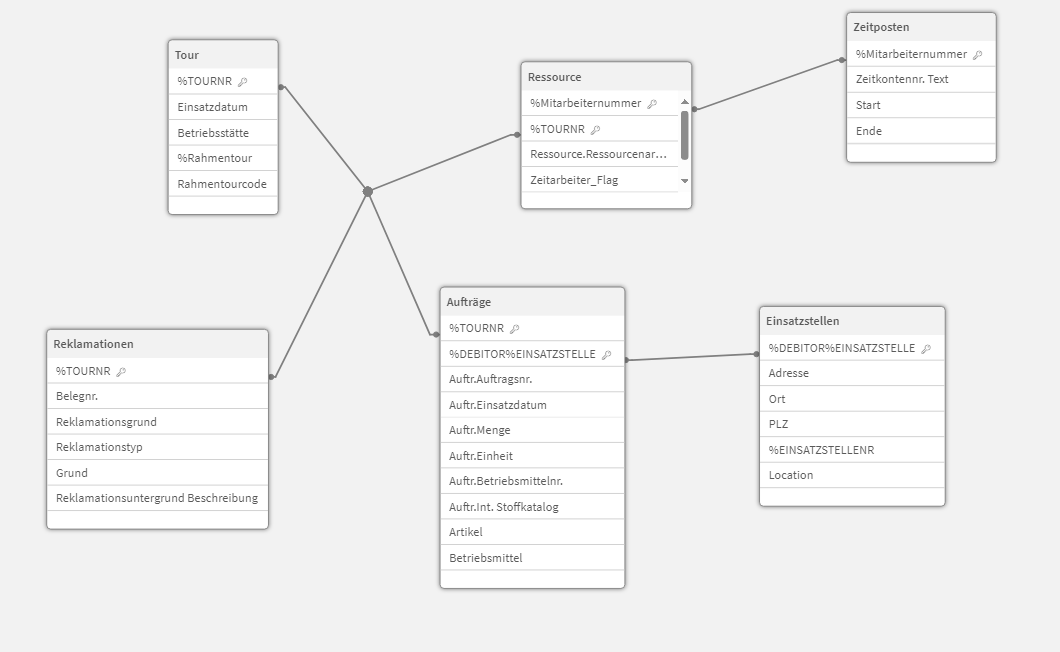

## Description of the fields (provided by Berlin Recycling

| Table | Field | Description |
| --- | --- | --- |
| Aufträge | %DEBITOR%EINSATZSTELLE | Foreign Key to „Einsatzstellen" (1:1) |
| Aufträge | %TOURNR | Foreign Key to „Tour" |
| Aufträge | Artikel | Article description (like paper, glass, waste) |
| Aufträge | Auftr.Auftragsnr. | Order Number |
| Aufträge | Auftr.Betriebsmittelnr. | Equipment Number |
| Aufträge | Auftr.Einheit | Unit |
| Aufträge | Auftr.Einsatzdatum | date of fullfillment of the order |
| Aufträge | Auftr.Int. Stoffkatalog | Internal article number |
| Aufträge | Auftr.Menge | Amount |
| Aufträge | Betriebsmittel | Equipment Name |
| Einsatzstellen | %DEBITOR%EINSATZSTELLE | Primary Key |
| Einsatzstellen | %EINSATZSTELLENR | Number of location |
| Einsatzstellen | Adresse | Street and housnumber |
| Einsatzstellen | Location | GPS-Coordinates |
| Einsatzstellen | Ort | City |
| Einsatzstellen | PLZ | Zip-Code |
| Reklamationen | %TOURNR | Foreign Key to „Tour" |
| Reklamationen | Belegnr. | Order number for the complaint |
| Reklamationen | Grund | reason |
| Reklamationen | Reklamationsgrund | Sub reason |
| Reklamationen | Reklamationstyp | Complaint type |
| Reklamationen | Reklamationsuntergrund Beschreibung | Sub reason description |
| Ressource | %Mitarbeiternummer | Foreign Key for employess |
| Ressource | %TOURNR | Foreign Key for „Tour" |
| Ressource | Ressource.Erster Fahrer | Flag, if ressource is the driver |
| Ressource | Zeitarbeiter_Flag | Flag, if ressource is temporary worker (for those w have no data for absence!) |
| Tour | %TOURNR | Primary Key |
| Tour | Betriebsstätte | Loaction of the tour |
| Tour | Einsatzdatum | Date of tour |
| Tour | Rahmentourcode | Blanket tour (each tour belongs to a blanket type as a type of grouping) |
| Zeitposten | %Mitarbeiternummer | Primary Key for employee |
| Zeitposten | Start | Start of abesence |
| Zeitposten | Ende | End of absence |
| Zeitposten | Zeitkontennr. Text | Absence reason |

## Load and show first 10 rows for each dataset and improve column names (English, shorter names)

### Orders

In [25]:
# orders = load_and_preview_dataset('orders', datafolder, 'auftraege', sep='\t')
# dtype_mappings ={'%TOURNR': int64, '%DEBITOR': int64, 'Auftr.Auftragsnr.': int64, 'Auftr.Einsatzdatum': int64, 'another_column': 'int64'}
orders = load_and_preview_dataset('orders', datafolder, 'Auftr„ge.csv', sep=',')

/var/folders/k6/4x420cvj75x4mh4djz2pbd900000gp/T/ipykernel_49221/1101745544.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)


Columns and data types of "orders" dataset


%TOURNR                      int64
%DEBITOR%EINSATZSTELLE       int64
Auftr.Auftragsnr.           object
Auftr.Einsatzdatum          object
Auftr.Menge                 object
Auftr.Einheit               object
Auftr.Betriebsmittelnr.    float64
Auftr.Int. Stoffkatalog     object
Artikel                     object
Betriebsmittel              object
dtype: object

Number of rows of "orders" dataset 13242295
Head of orders dataset


,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen



Missing values in orders:
 %TOURNR                       0
%DEBITOR%EINSATZSTELLE        0
Auftr.Auftragsnr.             0
Auftr.Einsatzdatum            0
Auftr.Menge                   0
Auftr.Einheit                41
Auftr.Betriebsmittelnr.    5647
Auftr.Int. Stoffkatalog    5059
Artikel                    5059
Betriebsmittel             5647
dtype: int64


In [26]:
# Rename columns for orders dataset
orders = orders.rename(
   columns={
       "%TOURNR": "tour_number",
       "%DEBITOR%EINSATZSTELLE": "customer_location",
       "Auftr.Auftragsnr.": "order_number",
       "Auftr.Einsatzdatum": "service_date",
       "Auftr.Menge": "quantity",
       "Auftr.Einheit": "unit",
       "Auftr.Betriebsmittelnr.": "equipment_number",
       "Auftr.Int. Stoffkatalog": "material_category",
       "Artikel": "article",
       "Betriebsmittel": "equipment_name",
   }
)
display(orders.head())

,tour_number,customer_location,order_number,service_date,quantity,unit,equipment_number,material_category,article,equipment_name
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [27]:
orders['quantity'] = orders['quantity'].str.replace(',', '.', regex=False)
orders['quantity'] = pd.to_numeric(orders['quantity'], errors='coerce')

### What kind of units for the quantities do we have and how many rows for each of them? 

In [28]:
count_per_unit = orders['unit'].value_counts()
count_per_unit

unit
Stück        13240713
m³               1063
STD               322
Stunde(n)         122
to                 26
Pauschal            7
Stunden             1
Name: count, dtype: int64

In [29]:
# top_3 = count_per_unit[:5]
# top_3['Other'] = count_per_unit[5:].sum()

# # Plot
# fig, ax = plt.subplots()
# ax.pie(top_3, labels=top_3.index, autopct='%1.1f%%', startangle=90)
# ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
# plt.show()

percentage_per_unit = orders['unit'].value_counts(normalize=True) * 100
print(percentage_per_unit)

unit
Stück        99.988363
m³            0.008027
STD           0.002432
Stunde(n)     0.000921
to            0.000196
Pauschal      0.000053
Stunden       0.000008
Name: proportion, dtype: float64


Given that almost all of them are in "Stück"(pieces), let's remove all rows with other unit types

In [30]:

orders = orders[orders['unit'] == 'Stück']

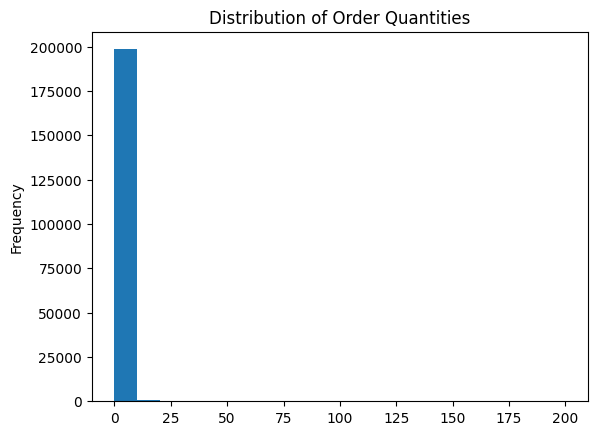

In [31]:
orders['quantity'].plot.hist(bins=20, title='Distribution of Order Quantities')
plt.show()

In [32]:
n = 50
customer_locations_count = orders['customer_location'].value_counts()
top_n_customer_locations = customer_locations_count.head(n)
others_count = customer_locations_count[n:].sum()
top_n_customer_locations_with_others = pd.concat([top_n_customer_locations, pd.Series({'Other': others_count})])
top_n_customer_locations_with_others

3307         2909
19239        2497
2051         2193
627          2127
17990        1888
2166         1876
3614         1730
24734        1696
2030         1575
30040        1570
2043         1540
683          1494
7943         1413
16957        1413
25339        1407
1623         1356
2500         1348
4975         1345
942          1302
6679         1256
19844        1252
1397         1251
27747        1250
19382        1219
19395        1211
2870         1197
28547        1192
22019        1176
6619         1132
4094         1112
12142        1109
4699         1101
2817         1097
547          1096
14698        1096
12729        1095
25338        1095
22083        1094
26118        1077
30576        1057
28877        1056
2693         1045
6936         1029
2189         1019
35786        1016
5965         1015
3493         1006
10687         995
25053         993
27284         992
Other    13173703
dtype: int64

average_orders_per_location: 95.41068340347034


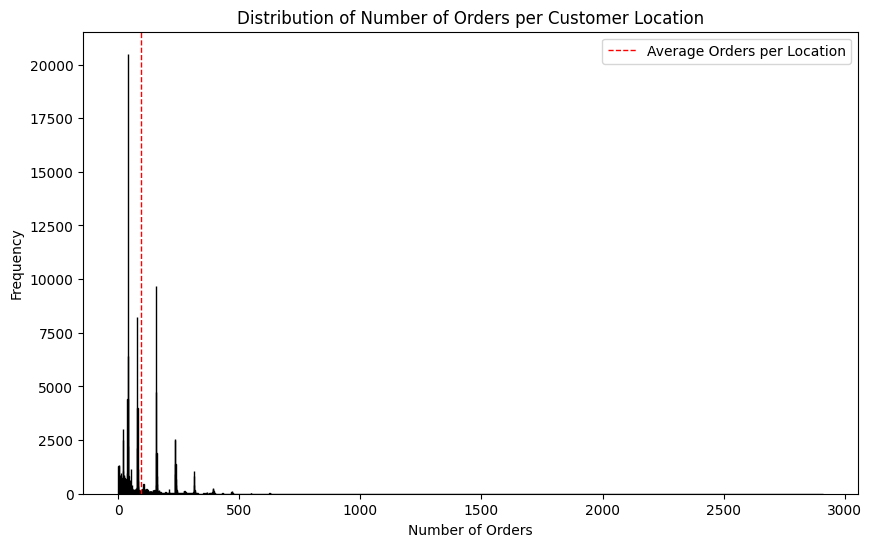

In [33]:
# Count the number of orders per customer location
orders_per_location = orders['customer_location'].value_counts()

# Calculate the average number of orders per customer location
average_orders_per_location = orders_per_location.mean()
print(f'average_orders_per_location: {average_orders_per_location}')



import matplotlib.pyplot as plt

# Plot the distribution of the number of orders per customer location
plt.figure(figsize=(10, 6))
plt.hist(orders_per_location, bins=range(1, orders_per_location.max() + 2), color='skyblue', edgecolor='black')
plt.axvline(average_orders_per_location, color='red', linestyle='dashed', linewidth=1, label='Average Orders per Location')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders per Customer Location')
plt.legend()

### Absence Events

In [35]:
# absence_events = load_and_preview_dataset('absence_events', datafolder, 'zeiposten')
absence_events = load_and_preview_dataset('absence_events', datafolder, 'Zeitposten.csv')

Columns and data types of "absence_events" dataset


%Mitarbeiternummer     int64
Zeitkontennr. Text    object
Start                 object
Ende                  object
dtype: object

Number of rows of "absence_events" dataset 10352
Head of absence_events dataset


,%Mitarbeiternummer,Zeitkontennr. Text,Start,Ende
0,1307,Urlaub bezahlt,09.02.2021,09.02.2021
1,1307,Urlaub bezahlt,24.03.2021,28.03.2021
2,1307,Urlaub bezahlt,05.05.2021,09.05.2021
3,1307,Urlaub bezahlt,14.06.2021,17.06.2021
4,1307,Urlaub bezahlt,25.07.2021,28.07.2021



Missing values in orders:
 %Mitarbeiternummer    0
Zeitkontennr. Text    0
Start                 0
Ende                  0
dtype: int64


In [36]:
# Rename columns for absence_events dataset
absence_events = absence_events.rename(columns={
    '%Mitarbeiternummer': 'employee_number',
    'Zeitkontennr. Text': 'time_account_number',
    'Text': 'absence_type',
    'Start': 'start_date',
    'Ende': 'end_date'
})
display(absence_events.head())

,employee_number,time_account_number,start_date,end_date
0,1307,Urlaub bezahlt,09.02.2021,09.02.2021
1,1307,Urlaub bezahlt,24.03.2021,28.03.2021
2,1307,Urlaub bezahlt,05.05.2021,09.05.2021
3,1307,Urlaub bezahlt,14.06.2021,17.06.2021
4,1307,Urlaub bezahlt,25.07.2021,28.07.2021


### Locations

In [38]:
locations = load_and_preview_dataset('locations', datafolder, 'Einsatzstelle.csv')

Columns and data types of "locations" dataset


%DEBITOR%EINSATZSTELLE     int64
Adresse                   object
Ort                       object
PLZ                        int64
%EINSATZSTELLENR           int64
Location                  object
dtype: object

Number of rows of "locations" dataset 138785
Head of locations dataset


,%DEBITOR%EINSATZSTELLE,Adresse,Ort,PLZ,%EINSATZSTELLENR,Location
0,33610,Ringstr. 8A,Berlin,12203,1,"[13.3086847,52.4368641]"
1,121533,Stahnsdorfer Damm 12,Berlin,14109,2,"[13.1747222,52.4154794]"
2,135160,Anhaltinerstr. 7,Berlin,14163,3,"[13.2567496,52.4308445]"
3,137834,Ilsensteinweg 4A,Berlin,14129,4,"[13.22047,52.4367907]"
4,118088,Claszeile 75,Berlin,14165,5,"[13.2596225,52.4173589]"



Missing values in orders:
 %DEBITOR%EINSATZSTELLE    0
Adresse                   0
Ort                       2
PLZ                       0
%EINSATZSTELLENR          0
Location                  2
dtype: int64


In [39]:
# Rename columns for locations dataset
locations = locations.rename(columns={
    '%DEBITOR': 'customer_number',
    '%DEBITOR%EINSATZSTELLE': 'location_number',
    'Adresse': 'address',
    'Ort': 'city',
    'PLZ': 'zip_code',
    '%EINSATZSTELLENR': 'location_id',
    'Location': 'coordinates'
})
display(locations.head())

,location_number,address,city,zip_code,location_id,coordinates
0,33610,Ringstr. 8A,Berlin,12203,1,"[13.3086847,52.4368641]"
1,121533,Stahnsdorfer Damm 12,Berlin,14109,2,"[13.1747222,52.4154794]"
2,135160,Anhaltinerstr. 7,Berlin,14163,3,"[13.2567496,52.4308445]"
3,137834,Ilsensteinweg 4A,Berlin,14129,4,"[13.22047,52.4367907]"
4,118088,Claszeile 75,Berlin,14165,5,"[13.2596225,52.4173589]"


### Tours

In [40]:
tours = load_and_preview_dataset('tours', datafolder, 'Tour.csv')

Columns and data types of "tours" dataset


%TOURNR            int64
Einsatzdatum      object
Betriebsstätte    object
%Rahmentour        int64
Rahmentourcode    object
dtype: object

Number of rows of "tours" dataset 138953
Head of tours dataset


,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335



Missing values in orders:
 %TOURNR           0
Einsatzdatum      0
Betriebsstätte    1
%Rahmentour       0
Rahmentourcode    0
dtype: int64


In [41]:
# Rename columns for tours dataset
tours = tours.rename(columns={
    '%TOURNR': 'tour_number',
    'Einsatzdatum': 'service_date',
    'Betriebsstätte': 'operational_site',
    '%Rahmentour': 'reference_tour_number',
    'Rahmentourcode': 'reference_tour_code'
})
display(tours.head())

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


### Claims

In [42]:
claims = load_and_preview_dataset('claims', datafolder, 'Reklamationen.csv')

Columns and data types of "claims" dataset


/var/folders/k6/4x420cvj75x4mh4djz2pbd900000gp/T/ipykernel_49221/1101745544.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)


%TOURNR                                 int64
Belegnr.                               object
Reklamationsgrund                       int64
Grund                                  object
Reklamationsuntergrund Beschreibung    object
dtype: object

Number of rows of "claims" dataset 790425
Head of claims dataset


,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
0,160016,A241067066,402,BB Deckel beschädigt,großer Deckel - Hauptdeckel
1,122761,A240871203,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
2,97644,A240929593,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
3,121874,A240803399,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
4,122263,A240977660,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)



Missing values in orders:
 %TOURNR                                     0
Belegnr.                                    0
Reklamationsgrund                           0
Grund                                      24
Reklamationsuntergrund Beschreibung    557898
dtype: int64


In [43]:
reason_counts = claims['Grund'].value_counts()

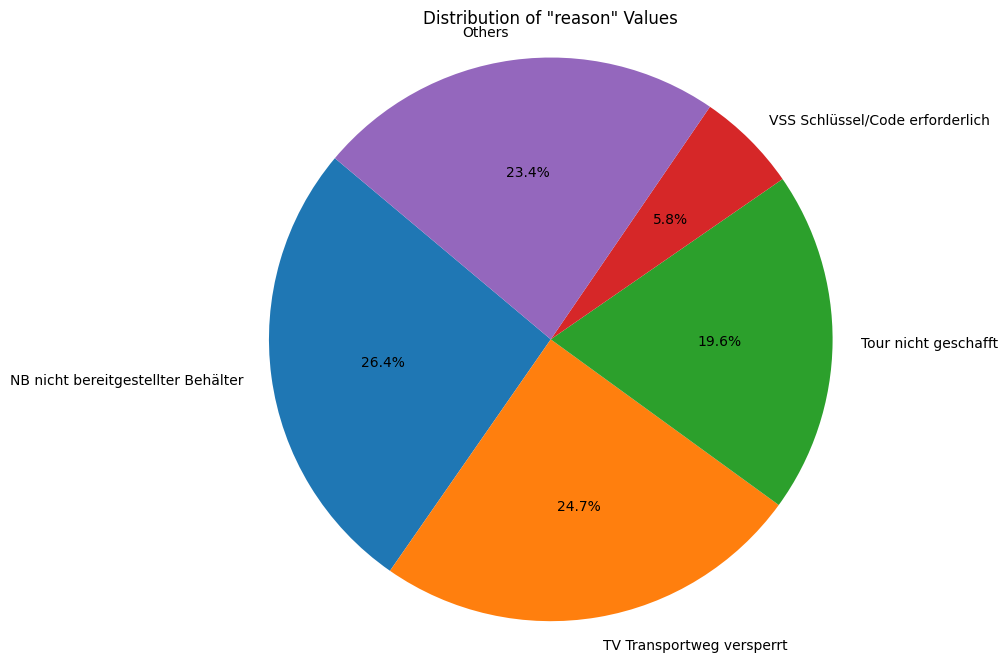

In [44]:
# reason_distribution_percentage = claims['Grund'].value_counts(normalize=True) * 100

# print(reason_distribution_percentage)

top_4 = reason_counts.head(4)
others_count = reason_counts[4:].sum()

# Create a new Series with top 4 and 'Others'
reason_distribution = pd.concat([top_4, pd.Series({'Others': others_count})])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(reason_distribution, labels=reason_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "reason" Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [45]:
# Rename columns for claims dataset
claims = claims.rename(columns={
    '%TOURNR': 'tour_number',
    'Belegnr.': 'claim_number',
    'Reklamationsgrund': 'complaint_reason',
    'Reklamationstyp': 'complaint_type',
    'Grund': 'complaint_ground',
    'Reklamationsuntergrund Beschreibung': 'complaint_description'
})
display(claims.head())

,tour_number,claim_number,complaint_reason,complaint_ground,complaint_description
0,160016,A241067066,402,BB Deckel beschädigt,großer Deckel - Hauptdeckel
1,122761,A240871203,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
2,97644,A240929593,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
3,121874,A240803399,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
4,122263,A240977660,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)


### Resources

In [46]:
resources = load_and_preview_dataset('resources', datafolder, 'Ressource.csv')

Columns and data types of "resources" dataset


%TOURNR                    int64
%Mitarbeiternummer         int64
Zeitarbeiter_Flag          int64
Ressource.Erster Fahrer    int64
dtype: object

Number of rows of "resources" dataset 344277
Head of resources dataset


,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,95350,1,0,1
1,95350,2,0,0
2,95351,3,1,0
3,95351,4,0,1
4,95351,5,0,0



Missing values in orders:
 %TOURNR                    0
%Mitarbeiternummer         0
Zeitarbeiter_Flag          0
Ressource.Erster Fahrer    0
dtype: int64


In [47]:
# Rename columns for ressources dataset
resources = resources.rename(columns={
    '%TOURNR': 'tour_number',
    '%Mitarbeiternummer': 'employee_number',
    'Zeitarbeiter_Flag': 'temporary_worker_flag',
    'Ressource.Erster Fahrer': 'primary_driver'
})
display(resources.head())

,tour_number,employee_number,temporary_worker_flag,primary_driver
0,95350,1,0,1
1,95350,2,0,0
2,95351,3,1,0
3,95351,4,0,1
4,95351,5,0,0


In [48]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'temporary_worker_flag' value
temporary_worker_counts = resources['temporary_worker_flag'].value_counts()

temporary_worker_counts

temporary_worker_flag
0    275556
1     68721
Name: count, dtype: int64

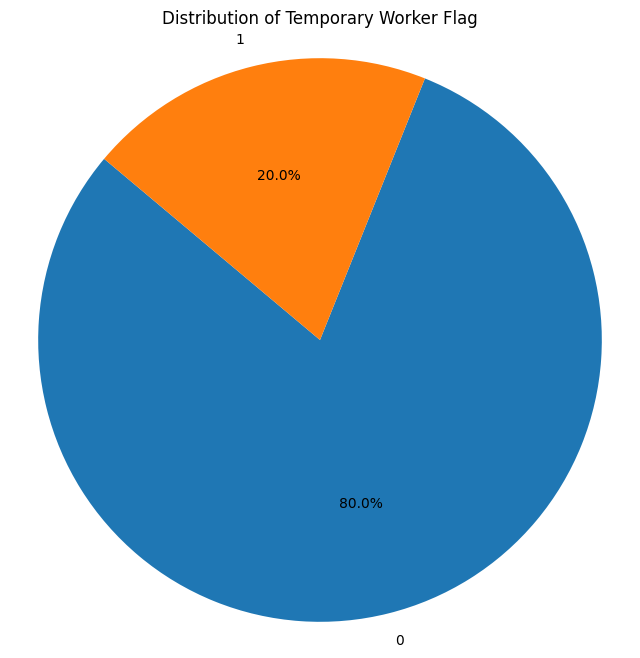

In [49]:

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(temporary_worker_counts, labels=temporary_worker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Temporary Worker Flag')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Current (2024-04-03) asssessment (GPT-guided) regarding data quality 

### General note for all challenges: Having data for more than one year (ideally 4-5 years at least) would be very beneficial to also include seasonal patterns/effects during the exploration and training phase. 

### Challenge 1 (Health improvements, Decrease in sickness and absence)
#### Confidence level (given the data structure and current number of rows provided)
Medium to High. The the number of rows across datasets provides a solid foundation for robust analysis and model development.

#### Which additional internal data (extra columns or even extra tables) are the most critical ones to improve the confidence even further?
* Detailed absence reasons to better understand health-related issues.
* Employee engagement and satisfaction surveys for a holistic view of well-being.
* Historical workload data to correlate with absence patterns.

#### Which (ideally publicly available) additional data sets could be interesting to improve the implementation (e.g. accuracy of the ML model) even further? 
* Public health statistics to correlate with absence trends.
* Industry benchmarks for health and safety to gauge performance against peers.

### Challenge 2 (Predict the probability of tour cancellations)
#### Confidence level (given the data structure and current number of rows provided)
Medium to High. The datasets provide a robust basis for predictive modeling.

#### Which additional internal data (extra columns or even extra tables) are the most critical ones to improve the confidence even further?
* Specific reasons for cancellations and detailed customer feedback for deeper insight.
* Historical data on customer interactions, potentially highlighting patterns leading to cancellations.

#### Which (ideally publicly available) additional data sets could be interesting to improve the implementation (e.g. accuracy of the ML model) even further? 
* Economic indicators that could affect cancellation rates.
* Public transport disruptions, which could influence the ability to fulfill orders.

### Challenge 3 (Dynamic rescheduling of schedules in the event of short-term changes)
#### Confidence level (given the data structure and current number of rows provided)
Medium to High. The data volume provides a solid basis for developing dynamic scheduling models.

#### Which additional internal data (extra columns or even extra tables) are the most critical ones to improve the confidence even further?
* Real-time status updates on orders, resources, and traffic conditions.
* Feedback loops from completed tours for continuous improvement.

#### Which (ideally publicly available) additional data sets could be interesting to improve the implementation (e.g. accuracy of the ML model) even further? 
* Real-time traffic flow data.
* Weather forecast data for planning around environmental conditions.

## Additional Input about Domain, Business Rules/Constraints etc

The answers to the following questions, asked to Berlin Recycling, start with a '=>'

* Is there any kind of
  * employee satisfaction data already (e.g. for better labeled data for supervised data)?
    * => currently we have no structured data about it.
  * data about the difficulty of a tour / location
    * => currently we have no data about it. We could provide some master data of the locations like number of steps, distance from road, but this data is not of good quality because in most cases there are default values.
  * data for disapproved (or: tried and failed) vacation requests
    * => this is not available in our source System. Viktoria Saphira maybe you can provide some estimations?
  * information about which employees are able to drive
    * => I can add this to the data source.

* In general: is there a comprehensive list of business rules / operational constraints that you can easily share with us, e.g. like:
  * At least one driver is needed and xy other roles
    * => there are some basic rules: reference tours starting with TG (glas), TP (paper) and TM (mixed waste) need at least 1 driver and one loader (sometimes there are 2 loaders assigned). These tours can handle bins from 120l to 1.100l (some vehicles can lift 2.500 and 4.500 l as well). These are so called Umleerbehälter/transfer container whereby the waste is tipped into the waste vehicle. Reference tours starting with TAK can handle so called “AK-Containers (Absetzkipper / skip loader)”, reference tours starting with TCT can handle containers with “CT (Container)” and reference tours with “IGLU” in the name can handle containers with “IGLU (underground and glass-iglu” in the name. These normally need at least one driver. Reference tours starting with “TT” are for placing, picking and exchanging bins up to 4.500 i.e., at start or end of a contract.
  * “This worker can only be assigned to locations xyz”
    * => we could provide information about the main starting location of the employees and tours are and add this to the data source.
  * One tour has legally to stop after xyz hours and needs at least xyz minutes of break time
    * => there are legal regulations:
      - Daily driving time
        - The maximum daily driving time for trucks is nine hours
        - An increase to 10 hours is possible twice a week
        - The maximum weekly driving time is 56 hours
        - In two consecutive weeks, the maximum total driving time is 90 hours
      - Driving time interruptions
        - After 4.5 hours of driving, there is a break of 45 minutes, which can be divided into two blocks. The first break is then 15 minutes, the second 30 minutes
      - Daily rest period
        - The daily rest period for truck drivers is at least eleven hours, which may be divided into two blocks. The first rest period of at least three hours is followed by a second rest period of at least nine hours
      - Weekly rest period
        - The weekly rest period must be at least 45 hours. Between two weekly rest periods of 45 hours each, it can be reduced to at least 24 hours. The reduction must be compensated within three weeks

* Is the following information available and/or might have any relevance?
  * What kind of different truck types are there? And if there are multiple: are these maybe in some way tracked together with the tours?
    * => Viktoria Saphira could you provide some information? But as I know most of our trucks are more or less the same type.
  * What bin sizes are there? And if there are multiple: are these maybe in some way tracked together with the tours?
    * => see answer above for the basic rules

* Are employees connected to different work units i.e. starting their day somewhere different than ending them or starting/ending on different locations/”headquarters” sometimes from day to day?
  * => we could provide information about the main starting location of the employees and tours are and add this to the data source

Does the following data exist?
* environmental exposures of waste workers
* performance and previous results of the company
* health records
  * => Unfortunately we don‘t have it at this time or we are not allowed to provide this for data privacy reasons



### Additional questions about data availability etc to Berlin Recyling (identified during call with Martin Mierke from Capgemini, 2024-04-08)

### Overall requests:
* collecting and alignment on final list of core business constraints/rules, like "at least one driver is needed and xy other roles per tour" or "a tour always starts at xyz and returns to abc"
 
### Additional clarification about business constraints/rules
* can we utilize employees on multiple tours
* What kind of different truck types are there?
* What bin sizes are there?
* Do they all start from the same headquarter? Or can tours start/end at different head quarters
* are employees connected to different work units  i.e. starting their day somewhere
* Is there any kind of employee satisfaction data already (e.g. for better labeled data for supervised data)? 

### Additional data requests or ideas how to derive them
* historical data about requested and rejected vacation processes (as labeled data, to find correlations to other patterns)
* Truck and bin sizes (if there are different ones)
* Data about the difficulty of a tour / location
* Restrictions like “this worker can only be assigned to locations xyz”
* Information about which employees are able to drive

### Additional questions
* How could we predict if someone will miss a tour
